<center>
<img src="img/matplotlib_seaborn.png">
_________

Для оценки распределения переменных, а также выявления закономерностей применяются методы первичного визуального анализа. Библиотеки **Matplotlib** и **Seaborn** являются инструментами для построения всевозможных графиков.

В предыдущем уроке было показано, что проводить отрисовку графиков можно, обащаясь непосредственно к столбцам таблицы в `pd.DataFrame`. Другие примеры визуализации связки библиотек Pandas + Matplotlib можно посмотреть по ссылке: https://pandas.pydata.org/pandas-docs/stable/visualization.html.

В данном уроке будут рассмотрены некоторые методы проведения первичного визуального анализа данных, основное внимание при этом будет уделено форматированию графиков.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)

# Содержание
_________________

<p>1. <a href="#plt"><font size='4'>Matplotlib</font></a></p>

<ul>
<p>1.1. <a href="#dim1"><font size='3'>Распределение одной переменной</font></a></p>
<p>1.2. <a href="#dim2"><font size='3'>Распределения двух переменных</font></a></p>
<p>1.3. <a href="#sub"><font size='3'>Настройка графиков с помощью subplots</font></a></p>
</ul>

<p>2. <a href="#seaborn"><font size='4'>Seaborn</font></a></p>
    

<p><a name="plt"></a></p>
# 1. <a href='https://matplotlib.org/gallery/index.html'>Matplotlib</a>
_________

Для демонстрации возможностей библиотек Matplotlib и Seaborn воспользуемся набором данных winemag-data_first150k.csv, содержащим информацию об оценках и характеристиках различных видов вина:
- **points** $-$ на какое количество баллов сомелье оценил вино;
- **variety** $-$ тип винограда, используемый для производства вина;
- **description** $-$ несколько предложений от сомелье, описывающих вкус вина, запах, внешний вид и т.д.;
- **country** $-$ страна производства;
- **province** $-$ провинция или государство производства;
- **region_1** $-$ область виноделия в провинции или штате;
- **region_2** $-$ иногда в зоне виноделия встречаются более конкретные районы, значение может быть пустым;
- **winery** $-$ завод, на котором произвели вино;
- **designation** $-$ обозначение;
- **price** $-$ цена.

In [2]:
reviews = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)

In [3]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<p><a name="dim1"></a></p>
## 1.1. Распределение одной переменной

<table>
<tr>
<td><img src="img/1dim-1.png" width="400px"/></td>
<td><img src="img/1dim-2.png" width="400px"/></td>
<td><img src="img/1dim-3.png" width="400px"/></td>
<td><img src="img/1dim-4.png" width="400px"/></td>

<!--<td><img src="https://i.imgur.com/ydaMhT1.png" width="350px"/></td>
<td><img src="https://i.imgur.com/WLAqDSV.png" width="350px"/></td>
<td><img src="https://i.imgur.com/Tj2y9gH.png"/"></td>
<td><img src="https://i.imgur.com/X0qXLCu.png"/></td>-->
</tr>
<tr>
<td style="font-weight:bold; font-size:16px; text-align:center">Bar Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Line Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Area Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Histogram</td>
</tr>
<tr>
<td style="text-align:center">df.plot.bar()</td>
<td style="text-align:center">df.plot.line()</td>
<td style="text-align:center">df.plot.area()</td>
<td style="text-align:center">df.plot.hist()</td>
</tr>
<tr>
<td style="text-align:center">Good for nominal and small ordinal categorical data.</td>
<td style="text-align:center">Good for ordinal categorical and interval data.</td>
<td style="text-align:center">Good for ordinal categorical and interval data.</td>
<td style="text-align:center">Good for interval data.</td>
</tr>
</table>

Предварительную оценку распределения переменных проводят с помощью столбчатых диаграмм и гистограмм распределения. Такая возможность предусмотрена в опциях метода `.plot()`, с помощью которого ранее производилась визуализация временных рядов. Кроме данного метода, Matplotlib предлагает и другие варианты построения, преимущество которых состоит в возможности форматировать графики.

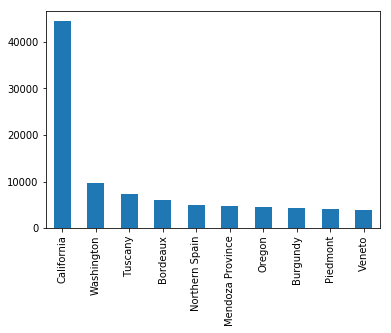

In [4]:
reviews['province'].value_counts().head(10).plot.bar()
plt.show()

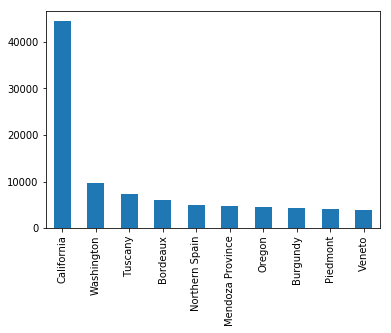

In [5]:
reviews['province'].value_counts().head(10).plot(kind='bar')
plt.show()

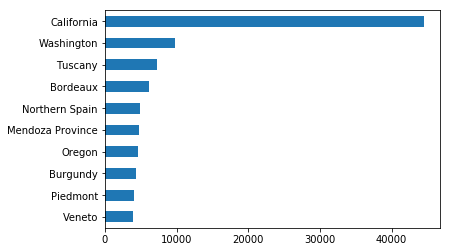

In [6]:
reviews['province'].value_counts(ascending=True).tail(10).plot.barh()
plt.show()

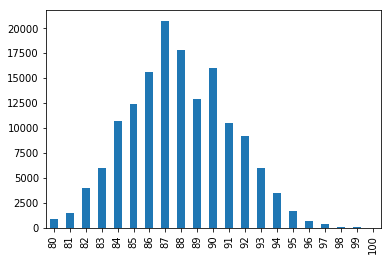

In [7]:
reviews['points'].value_counts().sort_index().plot.bar()
plt.show()

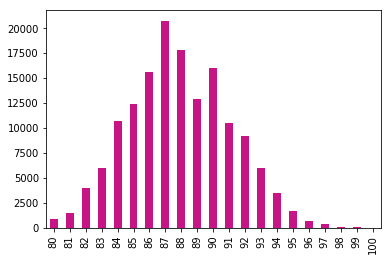

In [8]:
reviews['points'].value_counts().sort_index().plot.bar(
    color='mediumvioletred'
)
plt.show()

Добавление подписей к осям, их форматирование, добавлений названия и легенды возможно в виде последовательно заданных методов в той же ячейке, в которой происходит построение графика. Добавим, например, название графика распределения очков по винам. Основные параметры графика при этом были заданы внутри метода `plot.bar()`.

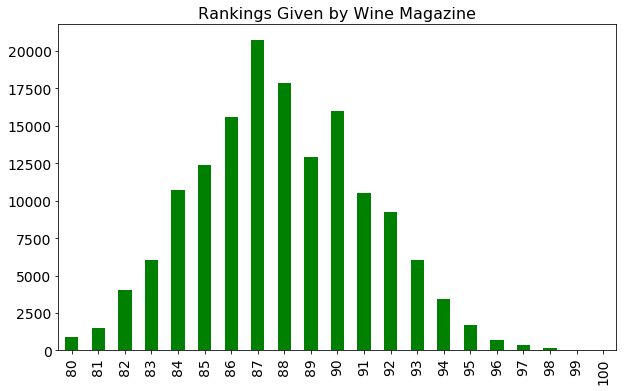

In [9]:
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(10, 6),
    color='green',
    fontsize=14
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=16)
plt.show()

Оценку распределения очков можно произвести с помощью методов:
- plot.line();
- plot.area();
- plot.hist().

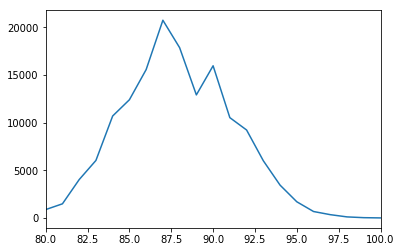

In [10]:
reviews['points'].value_counts().sort_index().plot.line();

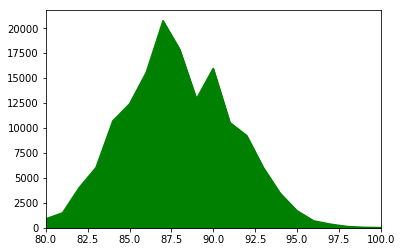

In [11]:
reviews['points'].value_counts().sort_index().plot.area(color='green');

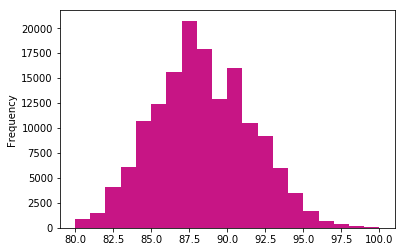

In [12]:
reviews['points'].plot.hist(bins=20, color='mediumvioletred');

<p><a name="dim2"></a></p>
## 1.2. Распределения двух переменных

<table>
<tr>
<td><img src="img/2dim-1.png" width="400px"/></td>
<td><img src="img/2dim-2.png" width="400px"/></td>
<td><img src="img/2dim-3.png" width="400px"/></td>
<td><img src="img/2dim-4.png" width="400px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px; text-align:center">Scatter Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Hex Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Stacked Bar Chart</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Bivariate Line Chart</td>
</tr>
<tr>
<td style="text-align:center">df.plot.scatter()</td>
<td style="text-align:center">df.plot.hex()</td>
<td style="text-align:center">df.plot.bar(stacked=True)</td>
<td style="text-align:center">df.plot.line()</td>
</tr>
<tr>
<td style="text-align:center">Закономерности между парами признаков.</td>
<td style="text-align:center">Подходит для непрерывных и категориальных переменных.</td>
<td style="text-align:center">Зависимости между непрерывными и порядковыми переменными.</td>
<td style="text-align:center">Подходит для порядковых переменных и временных рядов.</td>
</tr>
</table>

Порой при проведении анализа взаимодействия переменных можно увидеть скрытые закономерности в данных.

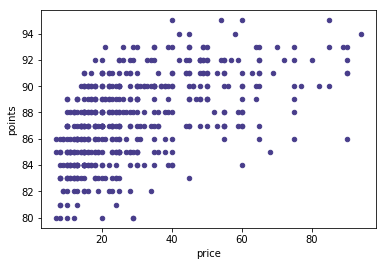

In [13]:
reviews[reviews['price'] < 100].sample(500).plot.scatter(x='price', y='points', 
                                                         color='darkslateblue'
                                                        );

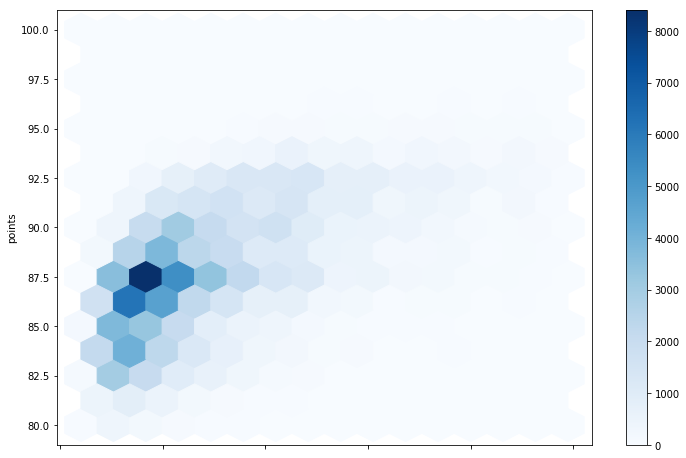

In [14]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points',
                                            figsize=(12,8), 
                                            gridsize=15, 
                                            cmap=plt.cm.Blues
                                           );

In [15]:
wine_counts = pd.read_csv("data/top-five-wine-score-counts.csv", index_col=0)

In [16]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


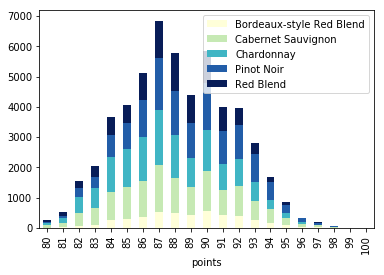

In [17]:
wine_counts.plot.bar(stacked=True, cmap='YlGnBu');

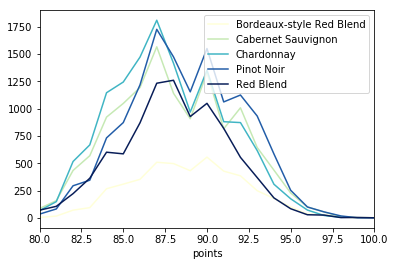

In [18]:
wine_counts.plot.line(cmap='YlGnBu');

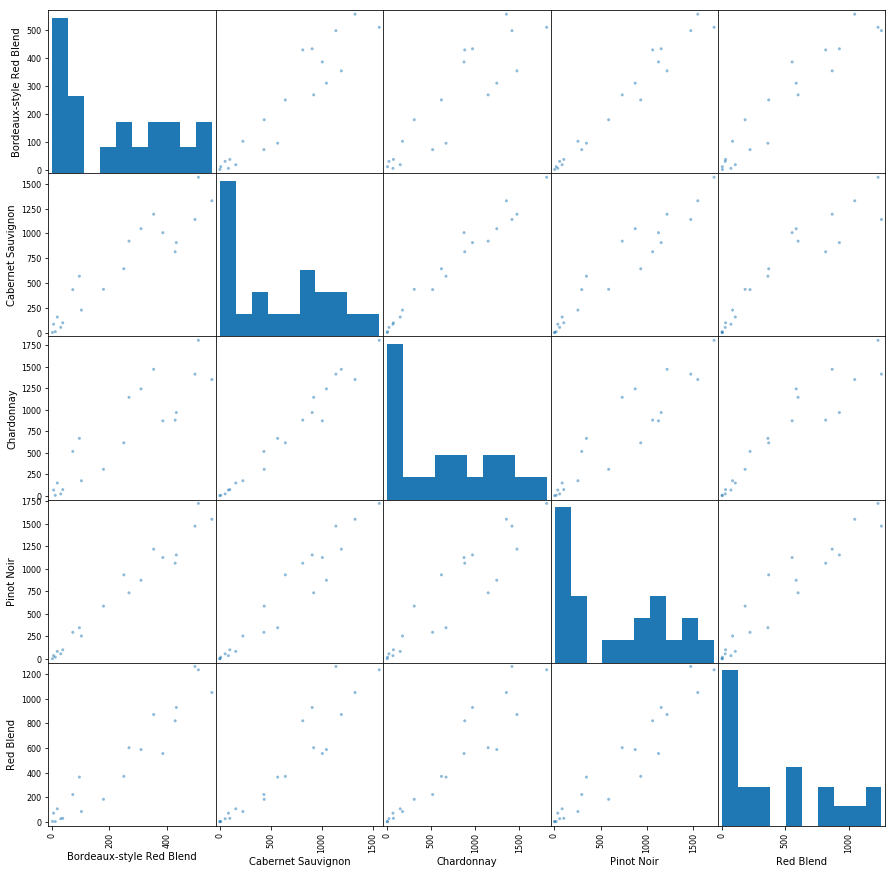

In [19]:
pd.plotting.scatter_matrix(wine_counts, 
                          figsize=(15, 15), 
                           diagonal='hist'
                          );

<p><a name="sub"></a></p>

## 1.3. Настройка графиков с помощью `subplots`

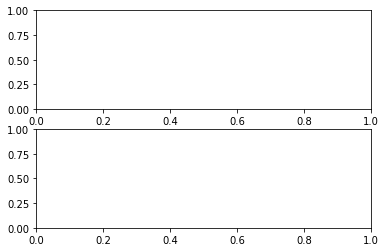

In [20]:
fig, axarr = plt.subplots(2, 1)

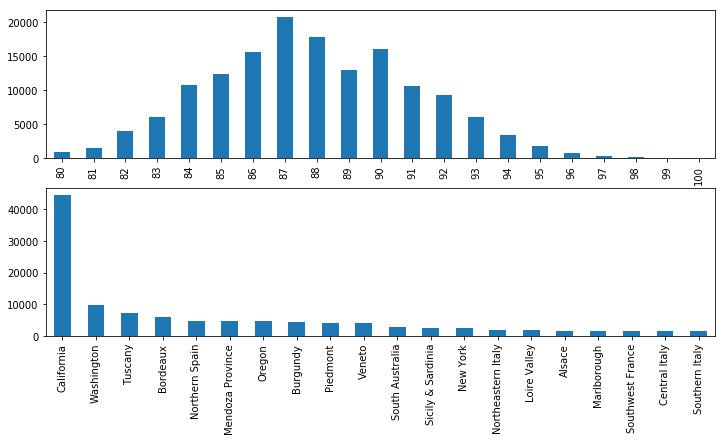

In [21]:
fig, axarr = plt.subplots(2, 1, figsize=(12,6))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
);

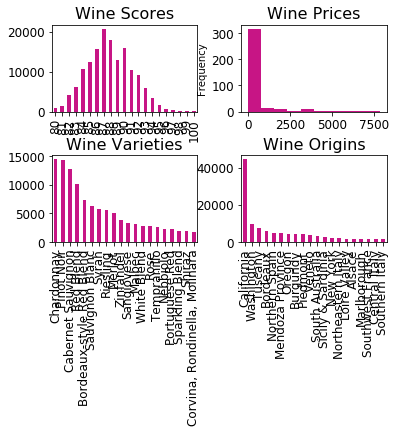

In [22]:
fig, axarr = plt.subplots(2, 2)

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0, 0],
    fontsize=12,
    color='mediumvioletred'
)
axarr[0, 0].set_title("Wine Scores", fontsize=16)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1, 0], 
    fontsize=12, 
    color='mediumvioletred'
)
axarr[1, 0].set_title("Wine Varieties", fontsize=16)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1, 1], 
    fontsize=12, 
    color='mediumvioletred'
)
axarr[1, 1].set_title("Wine Origins", fontsize=16)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0, 1], 
    fontsize=12, 
    color='mediumvioletred'
)
axarr[0, 1].set_title("Wine Prices", fontsize=16)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

<p><a name="seaborn"></a></p>

# 2. <a href="https://seaborn.pydata.org/examples/index.html">Seaborn</a>
_______

Библиотека Seaborn предоставляет те же возможности, что и Matplotlib, однако отличается более удобными способами построения и форматирования графиков, а также, в целом, графики выглядят более красочными.

<table>
<tr>
<td><img src="img/sns-1.png" width="400px"/></td>
<td><img src="img/sns-2.png" width="400px"/></td>
<td><img src="img/sns-3.png" width="400px"/></td>
<td><img src="img/sns-9.png" width="400px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px; text-align:center">Distribution Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Violin Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Box Plot</td>
<td style="font-weight:bold; font-size:16px; text-align:center">Heatmap</td>
</tr>
<tr>
<td style="text-align:center">sns.distplot()</td>
<td style="text-align:center">sns.violinplot()</td>
<td style="text-align:center">sns.boxplot()</td>
<td style="text-align:center">sns.heatmap</td>
</tr>
<tr>
<td style="text-align:center">Позволяет посмотреть на распределение переменной.</td>
<td style="text-align:center">Более наглядное представление распределения.</td>
<td style="text-align:center">"Ящик с усами".</td>
<td style="text-align:center">Матрица коэффициентов корреляции между переменными.</td>
</tr>
</table>

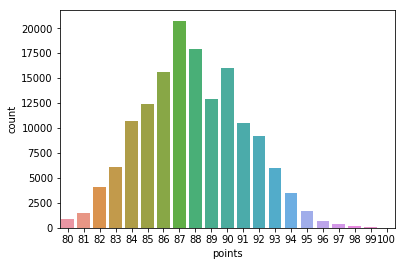

In [23]:
sns.countplot(reviews['points']);

In [24]:
price_sample = reviews[reviews['price'] < 200]['price']

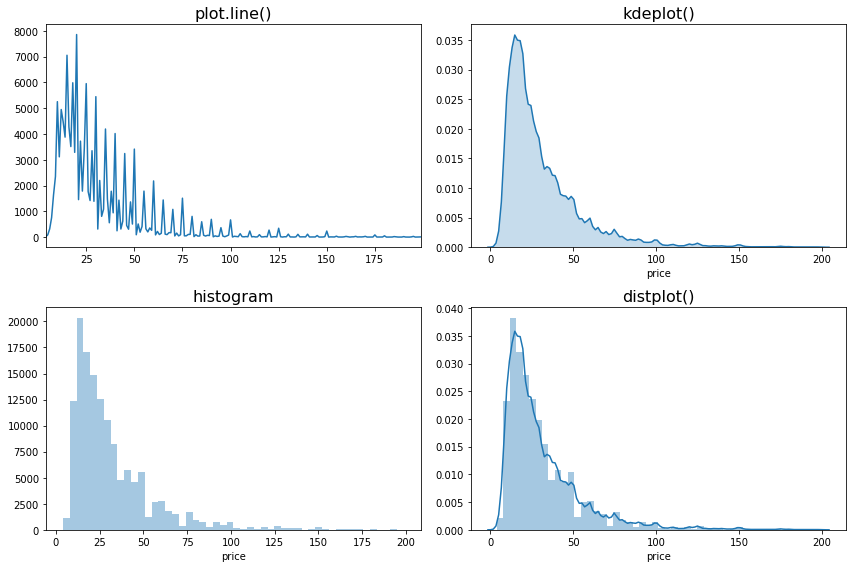

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

price_sample.value_counts().sort_index().plot.line(ax=axes[0, 0]);
axes[0, 0].set_title("plot.line()", fontsize=16)

sns.distplot(price_sample, 
             hist=False, 
             kde_kws={"shade": True}, 
             ax=axes[0, 1]
            )
axes[0, 1].set_title("kdeplot()", fontsize=16)

sns.distplot(price_sample, 
             kde=False, 
             ax=axes[1, 0]
            )
axes[1, 0].set_title("histogram", fontsize=16)

sns.distplot(price_sample, 
             ax=axes[1, 1]
            )
axes[1, 1].set_title("distplot()", fontsize=16)

plt.tight_layout()

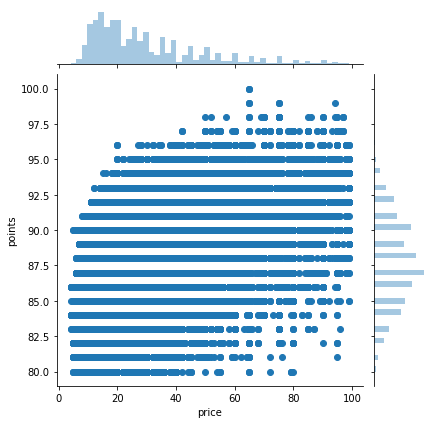

In [26]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100]);

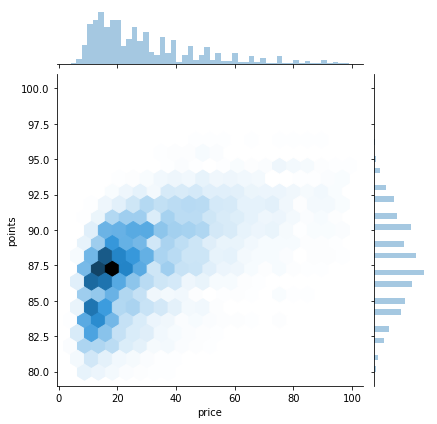

In [27]:
sns.jointplot(x='price', y='points', 
              data=reviews[reviews['price'] < 100], 
              kind='hex', 
              gridsize=20
             );

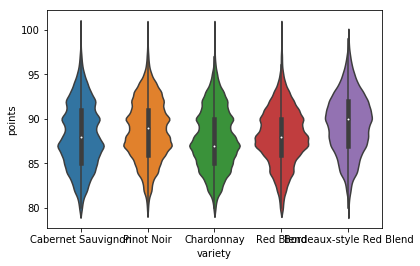

In [28]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
);

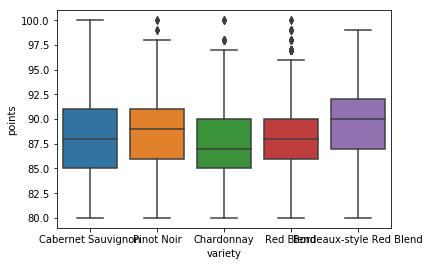

In [29]:
top_variety = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=top_variety
);

c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


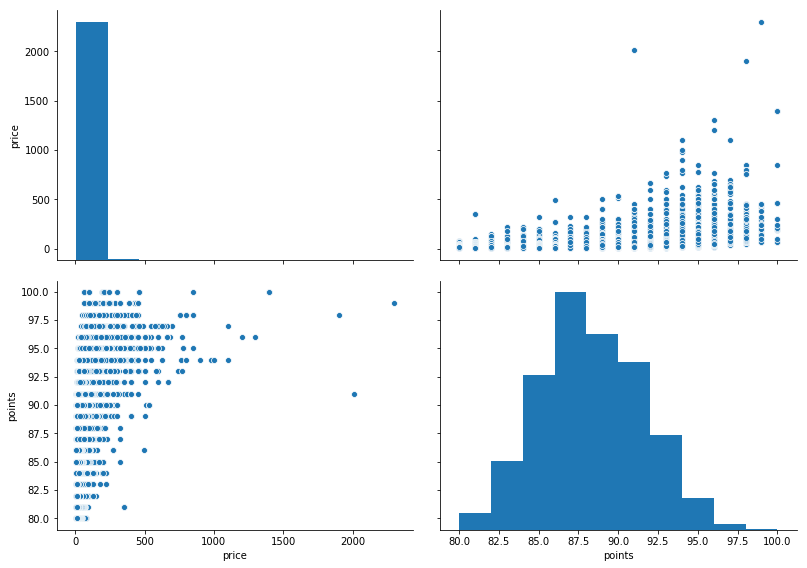

In [30]:
sns.pairplot(reviews[['price', 'points']].dropna(), size=4, aspect=1.4);

<div class="alert alert-info">

<h3> Упражнения</h3>
<p></p>

 <ol>
  <li>Загрузите набор данных daily-min-temperatures.csv.</li>
 <p></p>
 
  <li>Отобразите гистограмму распределения показателей температуры. На что похоже данное распределение?</li>
          <p></p>
 
  <li>Сгруппируйте имеющиеся наблюдения:</li>
      <ul>
          <li> по годам;</li>
          <li>по месяцам.</li>
      </ul>
      <p></p>
      Постройте ящики с усами для полученных наборов данных. Какие выводы можно сделать?
      <p></p>
      
  <li>Для ряда, сгруппированного по годам и месяцам (см. файл с предыдущего занятия), постройте диаграммы рассеяния с лагом от 1 до 12. Для удобства визуализации воспользуйтесь plt.subplots().</li>
<p></p>
  

 </ol> 
</div>

In [31]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [32]:
directory = 'data/*.csv' 
files = glob.glob(directory)[0]
files

'data\\daily-min-temperatures.csv'

In [33]:
df = pd.read_csv(files, index_col=0, parse_dates=True)
df = df.fillna(0)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
Temp    3650 non-null float64
dtypes: float64(1)
memory usage: 57.0 KB


In [35]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


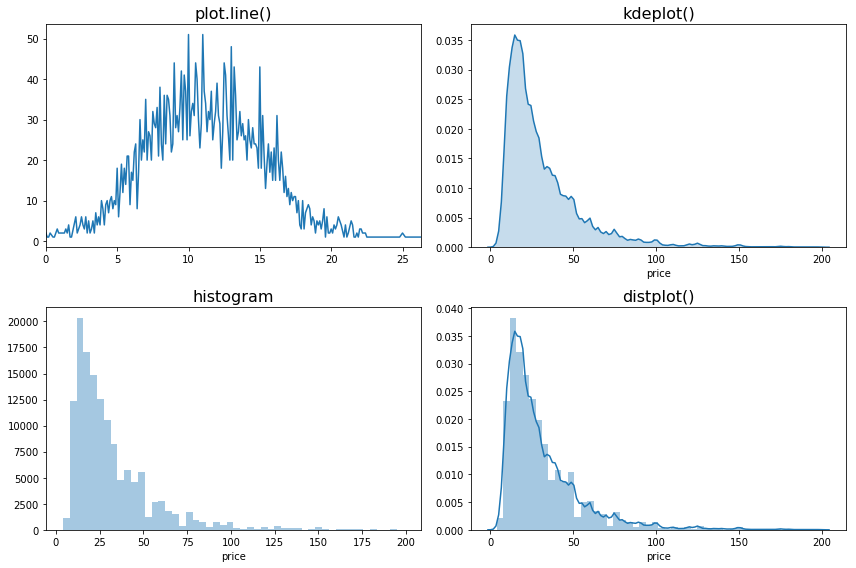

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

df['Temp'].value_counts().sort_index().plot.line(ax=axes[0, 0]);
axes[0, 0].set_title("plot.line()", fontsize=16)

sns.distplot(price_sample, 
             hist=False, 
             kde_kws={"shade": True}, 
             ax=axes[0, 1]
            )
axes[0, 1].set_title("kdeplot()", fontsize=16)

sns.distplot(price_sample, 
             kde=False, 
             ax=axes[1, 0]
            )
axes[1, 0].set_title("histogram", fontsize=16)

sns.distplot(price_sample, 
             ax=axes[1, 1]
            )
axes[1, 1].set_title("distplot()", fontsize=16)

plt.tight_layout()

Пуассон

In [83]:
mean_elec_year = df.groupby([df.index.year])[df.columns[0]].mean()
mean_elec_year

Date
1981    11.517260
1982    10.783562
1983    11.187397
1984    10.591781
1985    11.137534
1986    10.803288
1987    10.853151
1988    11.972055
1989    11.261918
1990    11.669589
Name: Temp, dtype: float64

In [102]:
df.groupby([df.index.year,df.index.month])[df.columns[0]].mean()

Date  Date
1981  1       17.712903
      2       17.678571
      3       13.500000
      4       12.356667
      5        9.490323
      6        7.306667
      7        7.577419
      8        7.238710
      9       10.143333
      10      10.087097
      11      11.890000
      12      13.680645
1982  1       16.567742
      2       15.921429
      3       14.935484
      4       11.470000
      5        9.583871
      6        5.606667
      7        4.641935
      8        7.903226
      9        7.280000
      10       9.545161
      11      12.486667
      12      13.754839
1983  1       13.180645
      2       16.807143
      3       15.777419
      4       10.596667
      5       10.116129
      6        6.600000
                ...    
1988  7        8.232258
      8        8.725806
      9        9.883333
      10      10.890323
      11      12.253333
      12      15.436667
1989  1       15.180645
      2       16.371429
      3       15.803226
      4       12.563333
     

In [85]:
mean_elec_month = df.groupby([df.index.month])[df.columns[0]].mean()

mean_elec_month

Date
1     15.030323
2     15.373759
3     14.565484
4     12.088333
5      9.866452
6      7.278333
7      6.692581
8      7.891290
9      8.976333
10    10.309355
11    12.479667
12    13.851948
Name: Temp, dtype: float64

In [86]:
mean_elec = df.groupby([df.index.year, df.index.month],as_index=True)[df.columns[0]].mean()

mean_elec.head()

Date  Date
1981  1       17.712903
      2       17.678571
      3       13.500000
      4       12.356667
      5        9.490323
Name: Temp, dtype: float64

Text(0.5, 1.0, 'boxplot_year')

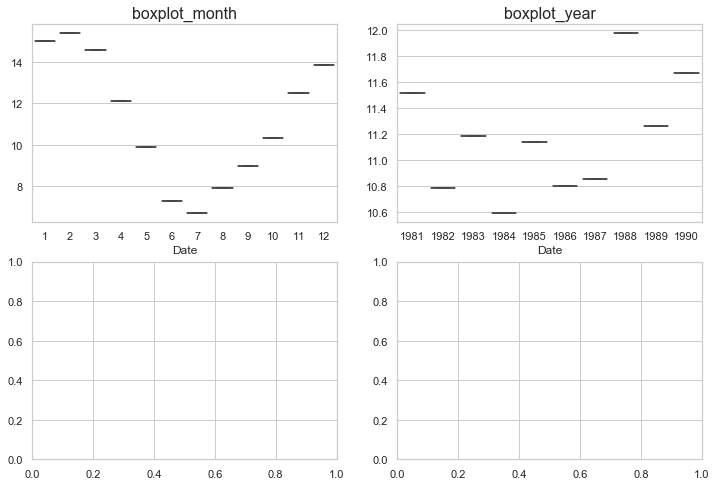

In [99]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.boxplot(x=mean_elec_month.index,y = mean_elec_month.values,ax=axes[0, 0])
axes[0, 0].set_title("boxplot_month", fontsize=16)

sns.boxplot(x=mean_elec_year.index,y = mean_elec_year.values,ax=axes[0, 1])
axes[0, 1].set_title("boxplot_year", fontsize=16)

In [91]:
?sns.boxplot

In [ ]:
mean_elec_year.index.values

In [ ]:
mean_elec.axes[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [ ]:
reviews[reviews['price'] < 100].sample(500).plot.scatter(x='price', y='points', 
                                                         color='darkslateblue'
                                                        );